## Julia Rushton and Jocelyn Rupp

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Input
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import average 
from tensorflow.keras.models import  Model

2024-04-17 12:56:30.509341: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Preparation (3 points total)  

In [30]:
from PIL import Image
import numpy as np
import os

# directory where flower dataset is located
base_dir = '/Users/juliarushton/Downloads/flower_images'
#base_dir = 'flower_images'

images = []
labels = []

acceptable_extensions = ['.jpg', '.jpeg']

# define a uniform size for all images (width, height) in pixels
uniform_size = (64, 64)  


for dir_name, _, file_names in os.walk(base_dir):
    # Get folder_name from the directory name
    new_label = os.path.basename(dir_name)
    
    for file_name in file_names:
        # Check if the file has an acceptable extension
        if any(file_name.lower().endswith(ext) for ext in acceptable_extensions):
            
            # Construct the full path to the image
            file_path = os.path.join(dir_name, file_name)
            
            try:
                # Open the image
                with Image.open(file_path) as img:
                    # Resize the image to the uniform size
                    img_resized = img.resize(uniform_size)
                    
                    # Convert image to a NumPy array
                    img_array = np.array(img_resized)
                    
                    # Append the linearized array to the list of image arrays
                    images.append(img_array)
                    
                    # Check if the new label already exists in the labels array
                    # if new_label not in labels:
                    # If it doesn't exist, append the new label
                    labels.append(new_label)
                    
            except IOError:
                # Handle the exception for files that cannot be opened.
                print(f"Cannot open {file_path}. Skipping.")

# Convert the list of linearized image arrays into a numpy array
image_features_table = np.vstack(##)

In [31]:
print(list(set(labels)))

['Lilly', 'Lotus', 'Orchid', 'Tulip', 'Sunflower']


In [32]:
print("Shape of image_features_table:", image_features_table.shape)
print("First few rows and columns of image_features_table:")
print(image_features_table[:5, :])  

Shape of image_features_table: (319936, 64, 3)
First few rows and columns of image_features_table:
[[[  0  94 137]
  [  1  95 138]
  [  1  98 140]
  [  5 102 143]
  [ 25 112 153]
  [ 35 117 157]
  [ 33 117 156]
  [ 37 119 159]
  [ 37 119 159]
  [ 33 117 157]
  [ 38 121 160]
  [ 38 119 160]
  [ 20 109 151]
  [  3 101 143]
  [  0  99 140]
  [ 11 104 146]
  [ 19 109 149]
  [ 30 115 155]
  [ 31 115 155]
  [ 18 109 150]
  [  4 100 142]
  [  0  93 136]
  [  0  92 135]
  [  0  97 139]
  [ 10 103 146]
  [ 12 105 146]
  [  2 101 142]
  [  3 100 141]
  [ 14 107 148]
  [ 27 114 153]
  [ 29 115 154]
  [ 20 109 149]
  [ 31 116 157]
  [ 36 119 160]
  [ 27 114 154]
  [ 20 109 151]
  [ 16 107 148]
  [ 11 105 146]
  [ 14 107 148]
  [ 17 107 149]
  [ 22 110 151]
  [ 17 107 147]
  [ 15 107 148]
  [ 11 105 147]
  [ 10 104 147]
  [ 15 107 148]
  [  8 103 145]
  [  1  99 142]
  [  2  99 141]
  [  1  98 141]
  [  1  98 141]
  [  0  99 140]
  [  2 100 142]
  [  8 102 145]
  [ 18 108 150]
  [ 26 113 154]
  [ 2

[1.5 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

accuracy and F1, because class is balanced, print amount in each folder to prove, and then show business case from lab2

[1.5 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Convince me that your cross validation method is a realistic mirroring of how an algorithm would be used in practice. 

In [18]:
import pandas as pd

labels_ohe = pd.get_dummies(labels, dtype = int).values

labels_ohe

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [19]:
#justify 80/20 split with explanation large enough data 
#stratify with trai and test

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
images = np.array(images)
images_train, images_test, labels_train, labels_test = train_test_split(images, labels_ohe, test_size=0.2, random_state=42, stratify = labels)
labels_number_test = np.argmax(labels_test, axis = 1)

### Modeling (6 points total)

[1.5 points]  Setup the training to use data expansion in Keras (also called data augmentation). Explain why the chosen data expansion techniques are appropriate for your dataset. You should make use of Keras augmentation layers, like in the class examples.

[2 points] Create a convolutional neural network to use on your data using Keras. Investigate at least two different convolutional network architectures and investigate changing one or more parameters of each architecture such as the number of filters. This means, at a  minimum, you will train a total of four models (2 different architectures, with 2 parameters changed in each architecture). Use the method of train/test splitting and evaluation metric that you argued for at the beginning of the lab. Visualize the performance of the training and validation sets per iteration (use the "history" parameter of Keras). Be sure that models converge. 

In [20]:
# accounts for more edge cases, pick the one that makes sense, add extra training data 
#augmentation

### 2 with different parameters

In [21]:
%%time 

cnn1 = Sequential()

# add in augmentations directly
cnn1.add( RandomFlip("horizontal") )
cnn1.add( RandomRotation(0.1) )

# let's start with an AlexNet style convolutional phase
cnn1.add(Conv2D(filters=32,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax

# no max pool before next conv layer!!
cnn1.add(Conv2D(filters=32,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
    

# add one layer on flattened output
cnn1.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn1.add(Flatten())
cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn1.add(Dense(len(set(labels)), activation='softmax'))

# Let's train the model 
cnn1.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])

cnn1.build((None,64,64,3))

cnn1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 64, 64, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,205,221 (16.04 MB)

 Trainable params: 4,205,221 (16.04 MB)

 Non-trainable params: 0 (0.00 B)

CPU times: user 170 ms, sys: 43.7 ms, total: 214 ms
Wall time: 198 ms


In [22]:
# saving each loss function at each epoch
history1 = cnn1.fit(
    images_train, labels_train, epochs = 10, validation_data = (images_test, labels_test)
)
#ruun with ten on augmentatiin, then see with epochs

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 203ms/step - accuracy: 0.2261 - loss: 160.1442 - val_accuracy: 0.2890 - val_loss: 1.6370
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 26s 206ms/step - accuracy: 0.3246 - loss: 1.7103 - val_accuracy: 0.4370 - val_loss: 1.3872
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 25s 197ms/step - accuracy: 0.3986 - loss: 1.8350 - val_accuracy: 0.3990 - val_loss: 1.4785
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 194ms/step - accuracy: 0.4213 - loss: 1.5109 - val_accuracy: 0.4130 - val_loss: 1.3739
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 25s 201ms/step - accuracy: 0.4267 - loss: 1.4998 - val_accuracy: 0.4640 - val_loss: 1.3407
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 25s 202ms/step - accuracy: 0.4247 - loss: 1.6850 - val_accuracy: 0.4160 - val_loss: 1.3776
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 245ms/step - accuracy: 0.4117 - loss: 1.5538 - val_accuracy: 0.4620 - val_loss: 1.5009
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 29s 236ms/step - accuracy: 0.4383 - loss:

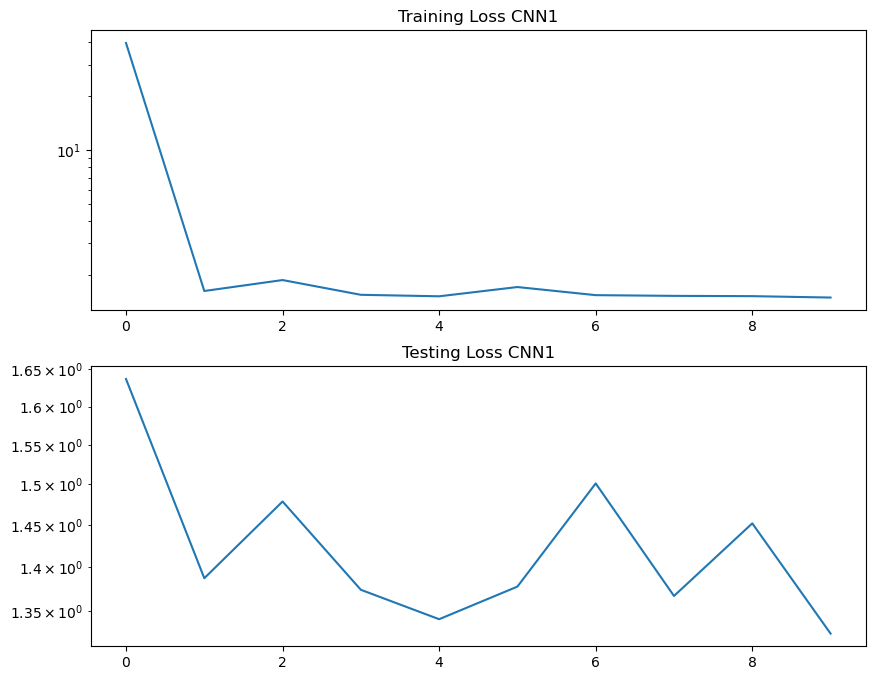

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(history1.history["loss"])
plt.title("Training Loss CNN1")
plt.yscale("log")

plt.subplot(2,1,2)
plt.plot(history1.history["val_loss"])
plt.title("Testing Loss CNN1")
plt.yscale("log")

plt.show()

In [24]:
import sklearn.metrics as mt

pred1 = cnn1.predict(images_test)
yhat1 = np.argmax(pred1, axis = 1)

print(mt.classification_report(labels_number_test, yhat1))

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step
              precision    recall  f1-score   support

           0       0.28      0.66      0.39       200
           1       0.58      0.28      0.37       200
           2       0.47      0.23      0.31       200
           3       0.76      0.74      0.75       200
           4       0.57      0.39      0.46       200

    accuracy                           0.46      1000
   macro avg       0.53      0.46      0.46      1000
weighted avg       0.53      0.46      0.46      1000



### CNN with with both filters as 64 and kernel_size(5,5) and third CNN

In [28]:
%%time 

cnn2 = Sequential()

# add in augmentations directly
cnn2.add( RandomFlip("horizontal") )
cnn2.add( RandomRotation(0.1) )

#changed filters and kernel size
# let's start with an AlexNet style convolutional phase
cnn2.add(Conv2D(filters=64,
                kernel_size=(5,5), 
                padding='same', 
                activation='relu')) # more compact syntax

#changed filters and kernel size
# no max pool before next conv layer!!
cnn2.add(Conv2D(filters=64,
                kernel_size=(5,5), 
                padding='same', 
                activation='relu')) # more compact syntax
cnn2.add(MaxPooling2D(pool_size=(2, 2)))

    

# add one layer on flattened output
cnn2.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn2.add(Flatten())
cnn2.add(Dense(128, activation='relu'))
cnn2.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn2.add(Dense(len(set(labels)), activation='softmax'))

# Let's train the model 
cnn2.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])

cnn2.build((None,64,64,3))

cnn2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_2 (RandomFlip)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_2               │ (None, 64, 64, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,496,709 (32.41 MB)

 Trainable params: 8,496,709 (32.41 MB)

 Non-trainable params: 0 (0.00 B)

CPU times: user 170 ms, sys: 32.1 ms, total: 202 ms
Wall time: 164 ms


In [29]:
history2 = cnn2.fit(
    images_train, labels_train, epochs = 10, validation_data = (images_test, labels_test)
)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.2361 - loss: 384.5012 - val_accuracy: 0.2700 - val_loss: 1.5881
Epoch 2/10
121/125 ━━━━━━━━━━━━━━━━━━━━ 3s 982ms/step - accuracy: 0.2601 - loss: 1.9289

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(history1.history["loss"])
plt.title("Training Loss CNN2")
plt.yscale("log")

plt.subplot(2,1,2)
plt.plot(history1.history["val_loss"])
plt.title("Testing Loss CNN2")
plt.yscale("log")

plt.show()

In [ ]:
import sklearn.metrics as mt

pred2 = cnn2.predict(images_test)
yhat2 = np.argmax(pred2, axis = 1)

print(mt.classification_report(labels_number_test, yhat2))

### 2 with different structure

In [39]:
%%time 

cnn3 = Sequential()

# add in augmentations directly
cnn3.add( RandomFlip("horizontal") )
cnn3.add( RandomRotation(0.1) )

# let's start with an AlexNet style convolutional phase
cnn3.add(Conv2D(filters=32,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax

# no max pool before next conv layer!!
cnn3.add(Conv2D(filters=32,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax
# no max pool before next conv layer!!
cnn3.add(Conv2D(filters=32,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
    

# add one layer on flattened output
cnn3.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn3.add(Flatten())
cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn3.add(Dense(len(set(labels)), activation='softmax'))

# Let's train the model 
cnn3.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])

cnn3.build((None,64,64,3))

cnn3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_6 (RandomFlip)      │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_6               │ (None, 64, 64, 1)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,213,893 (16.07 MB)

 Trainable params: 4,213,893 (16.07 MB)

 Non-trainable params: 0 (0.00 B)

CPU times: user 133 ms, sys: 21.7 ms, total: 154 ms
Wall time: 153 ms


In [ ]:
history3 = cnn3.fit(
    images_train, labels_train, epochs = 10, validation_data = (images_test, labels_test)
)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(history1.history["loss"])
plt.title("Training Loss CNN3")
plt.yscale("log")

plt.subplot(2,1,2)
plt.plot(history1.history["val_loss"])
plt.title("Testing Loss CNN3")
plt.yscale("log")

plt.show()

In [ ]:
import sklearn.metrics as mt

pred3 = cnn3.predict(images_test)
yhat3 = np.argmax(pred2, axis = 1)

print(mt.classification_report(labels_number_test, yhat3))

In [40]:
%%time 

cnn4 = Sequential()

# add in augmentations directly
cnn4.add( RandomFlip("horizontal") )
cnn4.add( RandomRotation(0.1) )

#changed filters and kernel size
# let's start with an AlexNet style convolutional phase
cnn4.add(Conv2D(filters=64,
                kernel_size=(5,5), 
                padding='same', 
                activation='relu')) # more compact syntax

#changed filters and kernel size
# no max pool before next conv layer!!
cnn4.add(Conv2D(filters=64,
                kernel_size=(5,5), 
                padding='same', 
                activation='relu')) # more compact syntax
cnn4.add(Conv2D(filters=64,
                kernel_size=(5,5), 
                padding='same', 
                activation='relu')) # more compact syntax
cnn4.add(MaxPooling2D(pool_size=(2, 2)))

    

# add one layer on flattened output
cnn4.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn4.add(Flatten())
cnn4.add(Dense(128, activation='relu'))
cnn4.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn4.add(Dense(len(set(labels)), activation='softmax'))

# Let's train the model 
cnn4.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])

cnn4.build((None,64,64,3))

cnn4.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_7 (RandomFlip)      │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_7               │ (None, 64, 64, 1)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 64, 64, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 64, 64, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 64, 64, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,595,973 (32.79 MB)

 Trainable params: 8,595,973 (32.79 MB)

 Non-trainable params: 0 (0.00 B)

CPU times: user 172 ms, sys: 11.5 ms, total: 184 ms
Wall time: 144 ms


[1.5 points] Visualize the final results of all the CNNs and interpret/compare the performances. Use proper statistics as appropriate, especially for comparing models. 

In [ ]:
history4 = cnn4.fit(
    images_train, labels_train, epochs = 10, validation_data = (images_test, labels_test)
)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(history1.history["loss"])
plt.title("Training Loss CNN4")
plt.yscale("log")

plt.subplot(2,1,2)
plt.plot(history1.history["val_loss"])
plt.title("Testing Loss CNN4")
plt.yscale("log")

plt.show()

In [ ]:
import sklearn.metrics as mt

pred4 = cnn4.predict(images_test)
yhat4 = np.argmax(pred2, axis = 1)

print(mt.classification_report(labels_number_test, yhat4))

[1 points] Compare the performance of your convolutional network to a standard multi-layer perceptron (MLP) using the receiver operating characteristic and area under the curve. Use proper statistical comparison techniques.  

### Exceptional Work (1 points total)

You have free reign to provide additional analyses. 
One idea (required for 7000 level students): Use transfer learning with pre-trained weights for your initial layers of your CNN. Compare the performance when using transfer learning to your best model from above in terms of classification performance. 